In [382]:
import pandas as pd


In [383]:
from sklearn.svm import SVC #algoritmo maquina soporte vecotrial
from sklearn.preprocessing import LabelEncoder  #manipulacion de texto se convierta a numeros
from sklearn.model_selection import train_test_split   #genera de los datos de entrada, dos sets para,
# uno el proceso de entrenaiento
#y el otro para validar el proceso de entrenamiento

In [384]:
from sklearn.metrics import recall_score, accuracy_score, f1_score, confusion_matrix,classification_report
import seaborn as asns

In [385]:

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from IPython.display import Image
import pydotplus

In [386]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/piel.csv",sep=',',header=0)
df.head(8)

,Age At Procurement,Mutation Count,Mutation Status,Person Gender,Primary Tumor Site,Sample Type,Specimen Site,Tissue Source Site,Type
0,85.0,NaN,WT,Male,head/neck,primary,head/neck,Tumor,sun-exposed
1,NaN,288.0,NRAS-Q61R,Female,extremity,metastasis,extremity,Cell line,sun-exposed
2,65.0,155.0,BRAF-V600K,Male,head/neck,metastasis,trunk,Tumor,sun-exposed
3,68.0,1.0,WT,Male,head/neck,primary,head/neck,Tumor,sun-exposed
4,58.0,2.0,WT,Female,head/neck,primary,head/neck,Tumor,sun-exposed
5,83.0,986.0,WT,Male,head/neck,metastasis,lung,Tumor,sun-exposed
6,56.0,92.0,WT,Female,choroid,metastasis,head/neck,Tumor,uveal
7,80.0,17.0,NRAS-Q61R,Female,heel,primary,sole,Tumor,acral


In [387]:
df.dtypes

Age At Procurement    float64
Mutation Count        float64
Mutation Status        object
Person Gender          object
Primary Tumor Site     object
Sample Type            object
Specimen Site          object
Tissue Source Site     object
Type                   object
dtype: object

In [388]:
df.shape

(91, 9)

In [389]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age At Procurement,87.0,NaN,NaN,NaN,64.712644,14.764751,25.0,54.5,64.0,77.5,94.0
Mutation Count,86.0,NaN,NaN,NaN,261.313953,499.455027,1.0,25.25,109.0,274.25,3642.0
Mutation Status,90,15,WT,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Person Gender,91,2,Male,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Primary Tumor Site,90,14,trunk,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sample Type,91,2,metastasis,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Specimen Site,89,15,trunk,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tissue Source Site,90,2,Tumor,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,90,5,sun-exposed,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

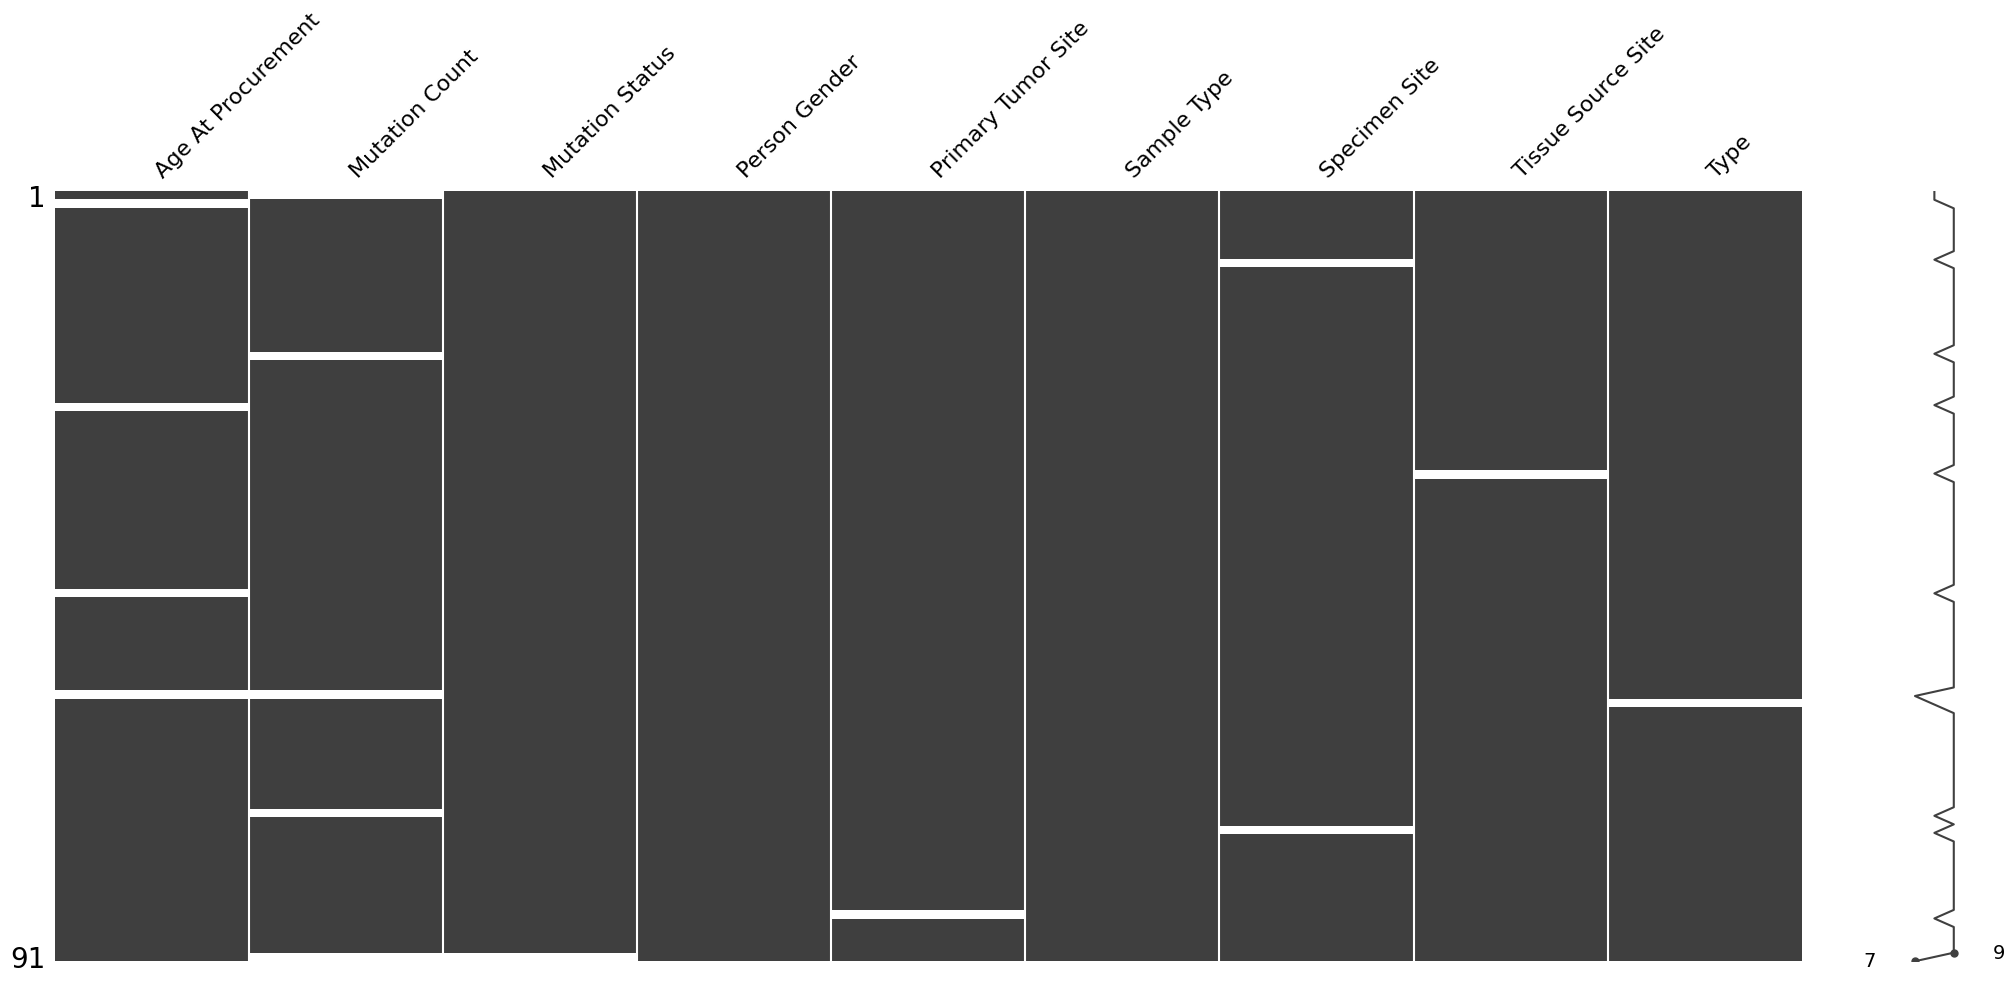

In [390]:
import missingno as msno
msno.matrix(df)


In [391]:
df.isna().sum()

Age At Procurement    4
Mutation Count        5
Mutation Status       1
Person Gender         0
Primary Tumor Site    1
Sample Type           0
Specimen Site         2
Tissue Source Site    1
Type                  1
dtype: int64

In [392]:
df['Age At Procurement'].fillna(0, inplace=True)
df['Mutation Count'].fillna(0, inplace=True)
df['Type'].fillna(0, inplace=True)


#df['Mutation Status'].fillna(0, inplace=True)
#df['Primary Tumor Site'].fillna(0, inplace=True)
#df['Specimen Site'].fillna(0, inplace=True)
#df['Tissue Source Site'].fillna(0, inplace=True)

In [393]:
df['Type'] = df['Type'].astype(str)

In [394]:

features=['Age At Procurement','Mutation Count','Mutation Status','Person Gender','Primary Tumor Site','Sample Type','Specimen Site','Tissue Source Site']

label='Type'
#label2='Mutation Status'
#label3='Person Gender'
#label4='Primary Tumor Site'
#label5='Sample Type'
#label6='Specimen Site'
#label7='Tissue Source Site'



In [395]:
le=LabelEncoder()
sobrevive=le
y=sobrevive.fit_transform(df[label])

le_gender = LabelEncoder()
le_status = LabelEncoder()
le_tumor_site = LabelEncoder()
le_sample_type = LabelEncoder()
le_specimen_site = LabelEncoder()
le_source_site = LabelEncoder()

df['Person Gender'] = le_gender.fit_transform(df['Person Gender'])
df['Mutation Status'] = le_status.fit_transform(df['Mutation Status'])
df['Primary Tumor Site'] = le_tumor_site.fit_transform(df['Primary Tumor Site'])
df['Sample Type'] = le_sample_type.fit_transform(df['Sample Type'])
df['Specimen Site'] = le_specimen_site.fit_transform(df['Specimen Site'])
df['Tissue Source Site'] = le_source_site.fit_transform(df['Tissue Source Site'])
y

array([3, 3, 3, 3, 3, 3, 5, 1, 1, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       1, 3, 3, 5, 3, 3, 3, 5, 3, 3, 1, 2, 2, 3, 1, 1, 3, 3, 3, 3, 3, 4,
       3, 4, 3, 3, 3, 3, 3, 1, 3, 3, 1, 2, 3, 1, 3, 3, 0, 3, 4, 3, 3, 3,
       3, 3, 3, 3, 4, 1, 3, 1, 2, 3, 3, 4, 2, 3, 3, 3, 1, 3, 5, 3, 4, 3,
       4, 4, 3])

In [396]:
df.dtypes

Age At Procurement    float64
Mutation Count        float64
Mutation Status         int64
Person Gender           int64
Primary Tumor Site      int64
Sample Type             int64
Specimen Site           int64
Tissue Source Site      int64
Type                   object
dtype: object

In [397]:
df.isna().sum()

Age At Procurement    0
Mutation Count        0
Mutation Status       0
Person Gender         0
Primary Tumor Site    0
Sample Type           0
Specimen Site         0
Tissue Source Site    0
Type                  0
dtype: int64

In [398]:
xtrain, xtest,ytrain, ytest = train_test_split(df[features],y,test_size=0.20, random_state=0)

In [399]:
print('xtrain.shape' )
print(xtrain.shape)

print('len(ytrain)')
print(len(ytrain))

print('xtest.shape ')
print(xtest.shape)

print('len(ytest)')
print(len(ytest))


xtrain.shape
(72, 8)
len(ytrain)
72
xtest.shape 
(19, 8)
len(ytest)
19


In [400]:
df['Type'].value_counts()

sun-exposed    57
acral          12
unknown        11
uveal           5
mucosal         5
0               1
Name: Type, dtype: int64

In [401]:
svm = SVC (probability=True)
modelo = svm.fit(xtrain,ytrain)
prediccion = modelo.predict(xtest)

In [402]:
# prediccion ~ ytest
prediccion_lista=prediccion.tolist()
ytest_lista = ytest.tolist()

i = 0

for pred in prediccion_lista:
  print(f"{pred} -> {ytest[i]}")
  i+=1

3 -> 3
3 -> 3
3 -> 3
3 -> 3
3 -> 4
3 -> 3
3 -> 4
3 -> 4
3 -> 3
3 -> 3
3 -> 1
3 -> 3
3 -> 2
3 -> 3
3 -> 1
3 -> 3
3 -> 3
3 -> 3
3 -> 3


score:  0.6842105263157895
recall_score:  0.6842105263157895
f1_score:  0.6842105263157895
classification_report=               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.68      0.81        19
           4       0.00      0.00      0.00         0

    accuracy                           0.68        19
   macro avg       0.25      0.17      0.20        19
weighted avg       1.00      0.68      0.81        19



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

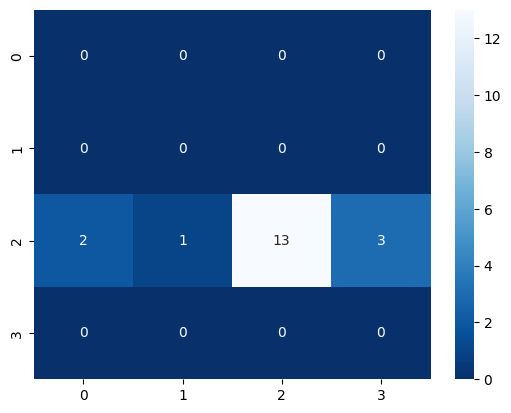

In [403]:
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ', recall_score(prediccion,ytest, average='micro'))

print('f1_score: ', f1_score(prediccion,ytest,  average='micro'))

print('classification_report=', classification_report(prediccion, ytest))

cf= confusion_matrix(prediccion, ytest)
asns.heatmap(cf, annot=True, cmap='Blues_r')

In [404]:
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ', recall_score(prediccion,ytest, average='micro'))

print('f1_score: ', f1_score(prediccion,ytest,  average='micro'))

print('classification_report=', classification_report(prediccion, ytest))

score:  0.6842105263157895
recall_score:  0.6842105263157895
f1_score:  0.6842105263157895
classification_report=               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.68      0.81        19
           4       0.00      0.00      0.00         0

    accuracy                           0.68        19
   macro avg       0.25      0.17      0.20        19
weighted avg       1.00      0.68      0.81        19



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [405]:
data = {'Age At Procurement': 61, 'Mutation Count': 246,'Mutation Count':45,'Mutation Status':60,'Person Gender':30,'Primary Tumor Site':55,'Sample Type':20,'Specimen Site':10,'Tissue Source Site':20}

pp =pd.DataFrame(data, index=[0])
pre_pp= modelo.predict(pp)
print(pp)
sobrevive.inverse_transform(pre_pp.tolist())[0]

   Age At Procurement  Mutation Count  Mutation Status  Person Gender  \
0                  61              45               60             30   

   Primary Tumor Site  Sample Type  Specimen Site  Tissue Source Site  
0                  55           20             10                  20  


'sun-exposed'

In [406]:
#DecisionTreeClassifier
svm = DecisionTreeClassifier (max_depth=5)
modelo = svm.fit(xtrain,ytrain)
prediccion = modelo.predict(xtest)

In [407]:

import graphviz
from sklearn.tree import export_graphviz,DecisionTreeClassifier
from IPython.display import Image
import pydotplus

In [408]:
''' dot_data = export_graphviz(modelo,out_file=None,
                           feature_names=features,
                           class_names= label,
                           filled=True,rounded=True,
                           special_characters=True)


graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())   '''

' dot_data = export_graphviz(modelo,out_file=None,\n                           feature_names=features,\n                           class_names= label,\n                           filled=True,rounded=True,\n                           special_characters=True)\n\n\ngraph = pydotplus.graph_from_dot_data(dot_data)\n\nImage(graph.create_png())   '

score:  0.7894736842105263
recall_score:  0.7894736842105263
f1_score:  0.7894736842105263
classification_report=               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.50      0.50         2
           2       1.00      0.50      0.67         2
           3       0.77      1.00      0.87        10
           4       1.00      1.00      1.00         3

    accuracy                           0.79        19
   macro avg       0.65      0.60      0.61        19
weighted avg       0.72      0.79      0.74        19



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

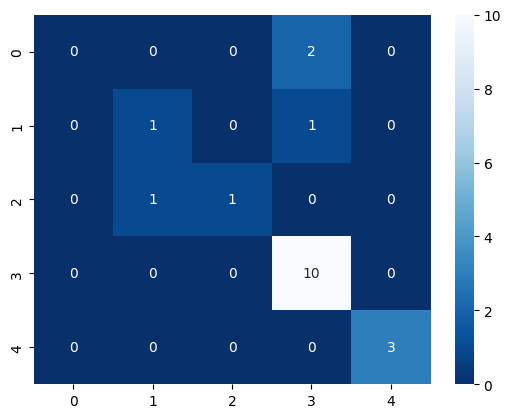

In [409]:
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ', recall_score(prediccion,ytest, average='micro'))

print('f1_score: ', f1_score(prediccion,ytest,  average='micro'))

print('classification_report=', classification_report(prediccion, ytest))

cf= confusion_matrix(prediccion, ytest)
asns.heatmap(cf, annot=True, cmap='Blues_r')

In [410]:
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ', recall_score(prediccion,ytest, average='micro'))

print('f1_score: ', f1_score(prediccion,ytest,  average='micro'))

print('classification_report=', classification_report(prediccion, ytest))

score:  0.7894736842105263
recall_score:  0.7894736842105263
f1_score:  0.7894736842105263
classification_report=               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.50      0.50         2
           2       1.00      0.50      0.67         2
           3       0.77      1.00      0.87        10
           4       1.00      1.00      1.00         3

    accuracy                           0.79        19
   macro avg       0.65      0.60      0.61        19
weighted avg       0.72      0.79      0.74        19



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [411]:
from sklearn.ensemble import GradientBoostingClassifier

In [412]:
#GradientBoostingClassifier
svm = GradientBoostingClassifier ()
modelo = svm.fit(xtrain,ytrain)
prediccion = modelo.predict(xtest)

score:  0.8421052631578947
recall_score:  0.8421052631578947
f1_score:  0.8421052631578947
classification_report=               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2
           2       1.00      0.50      0.67         2
           3       0.85      1.00      0.92        11
           4       1.00      1.00      1.00         3

    accuracy                           0.84        19
   macro avg       0.67      0.60      0.62        19
weighted avg       0.81      0.84      0.81        19



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

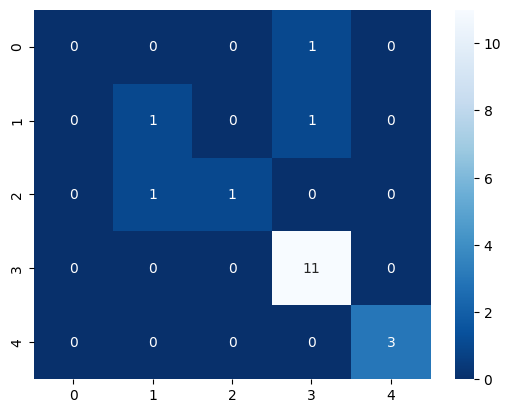

In [413]:
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ', recall_score(prediccion,ytest, average='micro'))

print('f1_score: ', f1_score(prediccion,ytest,  average='micro'))

print('classification_report=', classification_report(prediccion, ytest))

cf= confusion_matrix(prediccion, ytest)
asns.heatmap(cf, annot=True, cmap='Blues_r')

In [414]:
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ', recall_score(prediccion,ytest, average='micro'))

print('f1_score: ', f1_score(prediccion,ytest,  average='micro'))

print('classification_report=', classification_report(prediccion, ytest))

score:  0.8421052631578947
recall_score:  0.8421052631578947
f1_score:  0.8421052631578947
classification_report=               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2
           2       1.00      0.50      0.67         2
           3       0.85      1.00      0.92        11
           4       1.00      1.00      1.00         3

    accuracy                           0.84        19
   macro avg       0.67      0.60      0.62        19
weighted avg       0.81      0.84      0.81        19



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
